In [1]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
using KernelDensity

In [2]:
using JLD2
using FileIO

## Data Overview

In [3]:
function reduce_bins(x::AbstractArray, y::AbstractArray, δ::Integer)
    if length(x) == length(y)
        x_new = [x[i] for i in 1:δ:length(x)]
        y_new = [mean(y[i:(i+δ-1>length(y) ? length(y) : i+δ-1 )]) for i in 1:δ:length(y)]
        return vcat(x_new, [maximum(x)+1]), vcat(y_new, [0])
    else
        @warn "Dims Error"
    end
end

function reduced_steps(hist::H, δ::Integer) where {H<:Histogram}
    x = hist.edges[1][1:end-1]
    y = hist.weights
    return reduce_bins(x, y, δ)
end

reduced_steps (generic function with 1 method)

In [4]:
data = load("../data/experiment/images.jld")

Dict{String,Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [5]:
cam_1 = data["ImagesBTV50"]
cam_2 = data["ImagesBTV53"]
cam_3  = data["ImagesBTV26"]
cam_4 = data["ImagesIS2"]
charge  = data["charge"]

enumerate_events = collect(1:length(charge));

In [6]:
intensity(x) = [sum(x, dims=(2, 3))...]

intensity (generic function with 1 method)

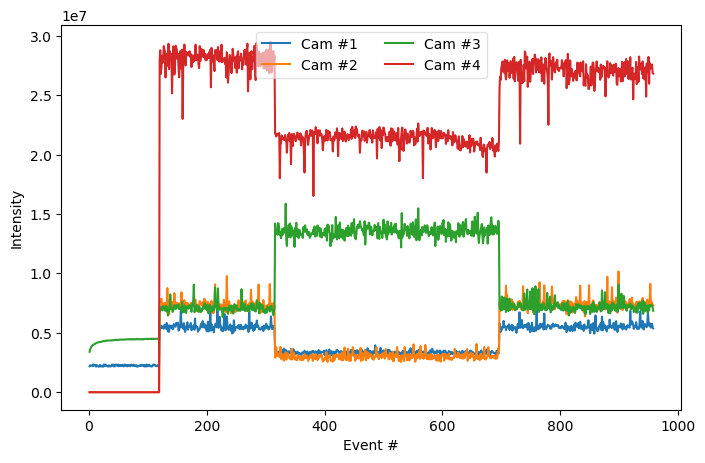

PyObject Text(0.5, 24.0, 'Event #')

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.plot(enumerate_events, intensity(cam_1), label="Cam #1")
ax.plot(enumerate_events, intensity(cam_2), label="Cam #2")
ax.plot(enumerate_events, intensity(cam_3), label="Cam #3")
ax.plot(enumerate_events, intensity(cam_4), label="Cam #4")

ax.legend(loc="upper center", frameon=true, framealpha=0.6, ncol=2, )

ax.set_ylabel("Intensity", )
ax.set_xlabel("Event #")

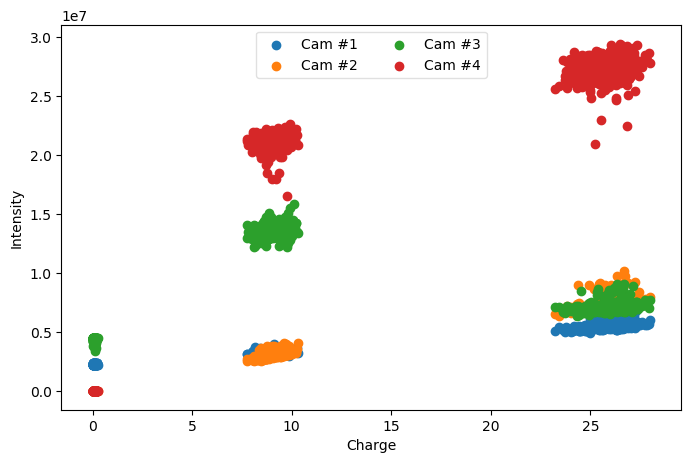

PyObject Text(0.5, 24.0, 'Charge')

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.scatter(charge, intensity(cam_1), label="Cam #1")
ax.scatter(charge, intensity(cam_2), label="Cam #2")
ax.scatter(charge, intensity(cam_3), label="Cam #3")
ax.scatter(charge, intensity(cam_4), label="Cam #4")

ax.legend(loc="upper center", frameon=true, framealpha=0.6, ncol=2, )

ax.set_ylabel("Intensity", )
ax.set_xlabel("Charge")

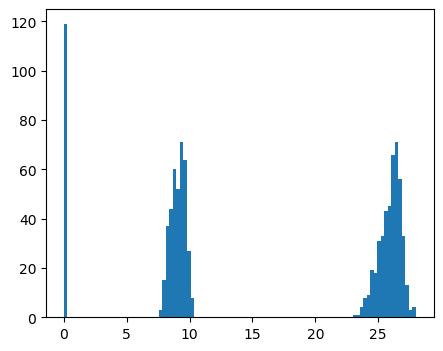

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.hist(charge, bins=100);

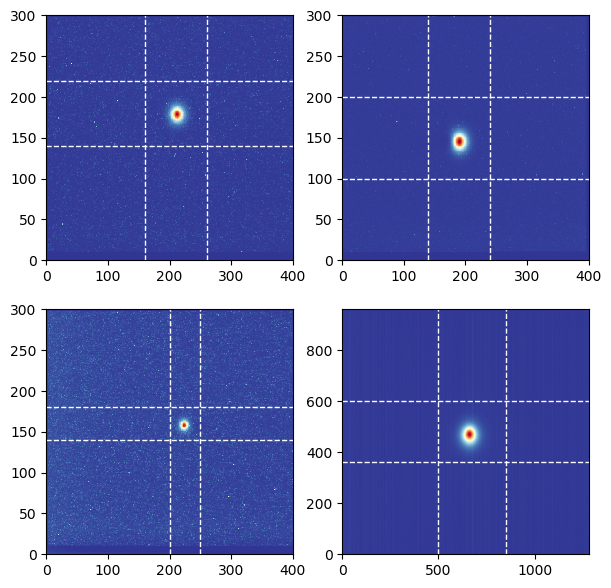

PyObject <matplotlib.lines.Line2D object at 0x7fe550d8b3d0>

In [10]:
cam_1_frame = (x=(160, 260), y=(140, 220))
cam_2_frame = (x=(140, 240), y=(100, 200))
cam_3_frame = (x=(200, 250), y=(140, 180))
cam_4_frame = (x=(500, 850), y=(360, 600))

fig, ax = plt.subplots(2,2, figsize=(7,7))

fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(mean(cam_1, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[1,1].axvline(cam_1_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axvline(cam_1_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axhline(cam_1_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,1].axhline(cam_1_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[1,2].pcolormesh(mean(cam_2, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[1,2].axvline(cam_2_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axvline(cam_2_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axhline(cam_2_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[1,2].axhline(cam_2_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[2,1].pcolormesh(mean(cam_3, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[2,1].axvline(cam_3_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axvline(cam_3_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axhline(cam_3_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,1].axhline(cam_3_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")

ax[2,2].pcolormesh(mean(cam_4, dims=1)[1,:,:], cmap="RdYlBu_r")
ax[2,2].axvline(cam_4_frame.x[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axvline(cam_4_frame.x[2], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axhline(cam_4_frame.y[1], c="white", label="Truth", alpha=1, lw=1, ls="--")
ax[2,2].axhline(cam_4_frame.y[2], c="white", label="Truth", alpha=1, lw=1, ls="--")


# 1. Measurements with Small Charge: 

In [11]:
event_mask = 5. .< charge .< 15.
# event_mask = charge .> 15.

cam_1_m1 = cam_1[event_mask,:,:]
cam_2_m1 = cam_2[event_mask,:,:]
cam_3_m1 = cam_3[event_mask,:,:]
cam_4_m1 = cam_4[event_mask,:,:]
charge_m1 = charge[event_mask] .* 1.0

cam_1_m1 = round.(Int64, cam_1_m1[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]])
cam_2_m1 = round.(Int64, cam_2_m1[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]]) 
cam_3_m1 = round.(Int64, cam_3_m1[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]])
cam_4_m1 = round.(Int64, cam_4_m1[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]])

# FileIO.save("../data/experiment/m1/images-1.jld2", 
#     Dict("cam_1" => cam_1_m1, 
#         "cam_2" => cam_2_m1, 
#         "cam_3" => cam_3_m1, 
#         "cam_4" => cam_4_m1, 
#         "charge" => charge_m1))

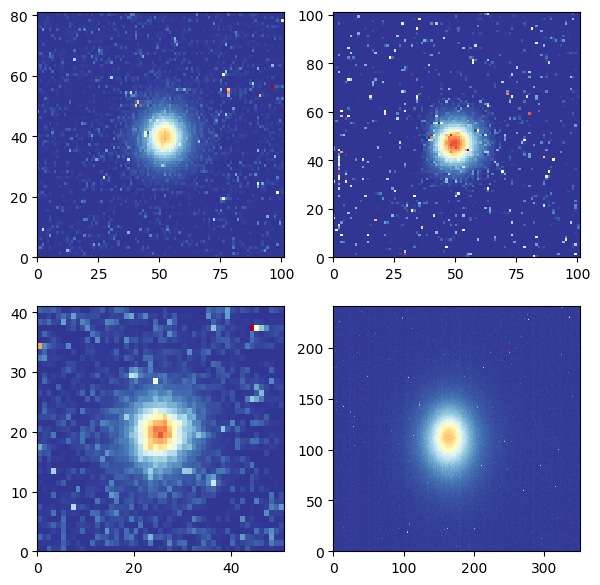

PyObject <matplotlib.collections.QuadMesh object at 0x7fe0f84b5e90>

In [12]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(cam_1_m1[210,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(cam_2_m1[210,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(cam_3_m1[210,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(cam_4_m1[210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [13]:
# noise: 

bins = 0:1:4096

# 4096 bin is unused - valid are 0:4095

# kde_noise = kde(data_temp[pixel_mask]);

In [14]:
# Camera 1: 

data_temp = cam_1[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_1 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_1 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [15]:
# Camera 2: 

data_temp = cam_2[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_2 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_2 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [16]:
# Camera 3: 

data_temp = cam_3[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_3 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_3 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [17]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:100,:] .= false
pixel_mask[:,end-100:end,:] .= false
pixel_mask[:,:,1:100] .= false
pixel_mask[:,:,end-100:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

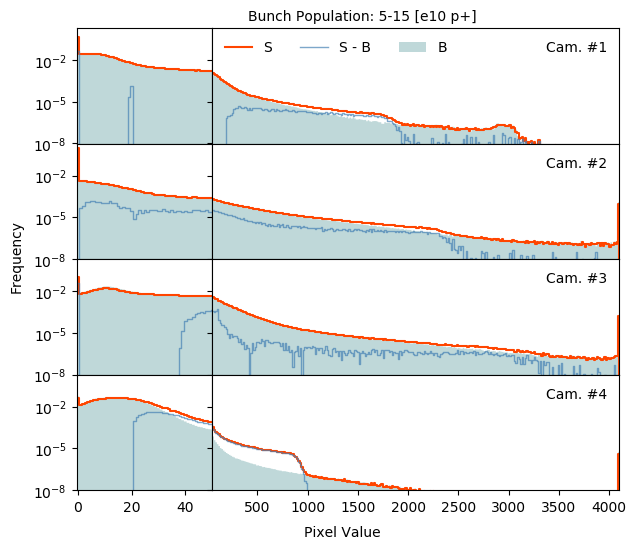

PyObject Text(0.37, 0.9, 'Bunch Population: 5-15 [e10 p+]')

In [18]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,2, figsize=(7,6), sharey=true,  gridspec_kw=Dict("width_ratios"=> [1,3]))

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 15)

ax[5].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[5].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[5].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[5].legend(loc="upper left", ncol=3, framealpha=0.0)
ax[5].text(0.82,0.8,"Cam. #1", transform=ax[5].transAxes)
ax[1].set_xlim(-0.5, 50)
ax[5].set_xlim(50,4097)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 15)

ax[6].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[6].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[6].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[6].text(0.82,0.8,"Cam. #2", transform=ax[6].transAxes)
ax[2].set_xlim(-0.5, 50)
ax[6].set_xlim(50,4097)
ax[6].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 15)

ax[7].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[7].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[7].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[7].text(0.82,0.8,"Cam. #3", transform=ax[7].transAxes)
ax[3].set_xlim(-0.5, 50)
ax[7].set_xlim(50,4097)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 15)

ax[8].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[8].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[8].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[8].text(0.82,0.8,"Cam. #4", transform=ax[8].transAxes)
ax[4].set_yscale("log")
ax[4].set_xlim(-0.5, 50)
ax[8].set_xlim(50,4097)
ax[8].set_ylim(10e-9, 2)

ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
ax[7].set_xticks([])
ax[5].set_xticks([])
ax[6].set_xticks([])

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
# fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 5-15 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

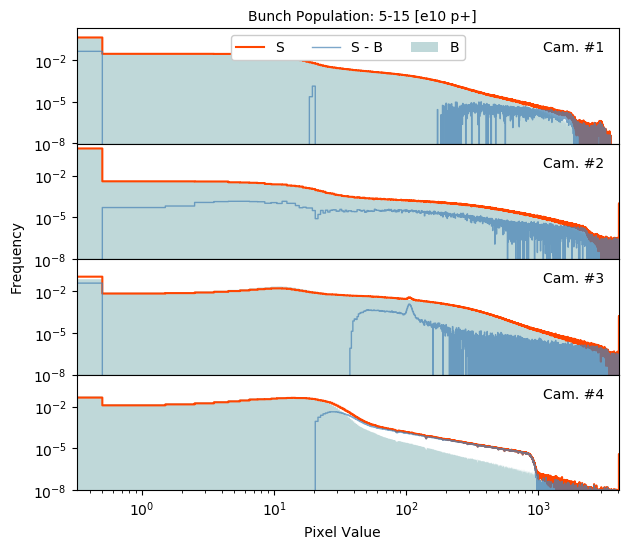

PyObject Text(0.37, 0.9, 'Bunch Population: 5-15 [e10 p+]')

In [19]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,1, figsize=(7,6), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[1].legend(loc="upper center", ncol=3, framealpha=1)
ax[1].text(0.86,0.8,"Cam. #1", transform=ax[1].transAxes)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[2].text(0.86,0.8,"Cam. #2", transform=ax[2].transAxes)
ax[2].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[3].text(0.86,0.8,"Cam. #3", transform=ax[3].transAxes)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[4].text(0.86,0.8,"Cam. #4", transform=ax[4].transAxes)
ax[4].set_yscale("log")
ax[4].set_xscale("log")
ax[4].set_xlim(0,4097)
ax[4].set_ylim(10e-9, 2)

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
# fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 5-15 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

In [ ]:
# FileIO.save("../data/experiment/m1/background-1.jld2", 
#     Dict("cam_1" => histogram_noise_cam_1, 
#         "cam_2" => histogram_noise_cam_2, 
#         "cam_3" => histogram_noise_cam_3, 
#         "cam_4" => histogram_noise_cam_4))

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(5,5))

# data_tmp_1 = cam_1[150,:,:][cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]]

# ax.imshow(replace(x->0 < x< 2500 ? x : NaN, data_tmp_1.*1.0), cmap="RdYlBu_r")

# 2. Measurements with Large Charge: 

In [20]:
event_mask = charge .> 15.

cam_1_m1 = cam_1[event_mask,:,:]
cam_2_m1 = cam_2[event_mask,:,:]
cam_3_m1 = cam_3[event_mask,:,:]
cam_4_m1 = cam_4[event_mask,:,:]
charge_m1 = charge[event_mask] .* 1.0

cam_1_m1 = round.(Int64, cam_1_m1[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]])
cam_2_m1 = round.(Int64, cam_2_m1[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]]) 
cam_3_m1 = round.(Int64, cam_3_m1[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]])
cam_4_m1 = round.(Int64, cam_4_m1[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]])

# FileIO.save("../data/experiment/m2/images-2.jld2", 
#     Dict("cam_1" => cam_1_m1, 
#         "cam_2" => cam_2_m1, 
#         "cam_3" => cam_3_m1, 
#         "cam_4" => cam_4_m1, 
#         "charge" => charge_m1))

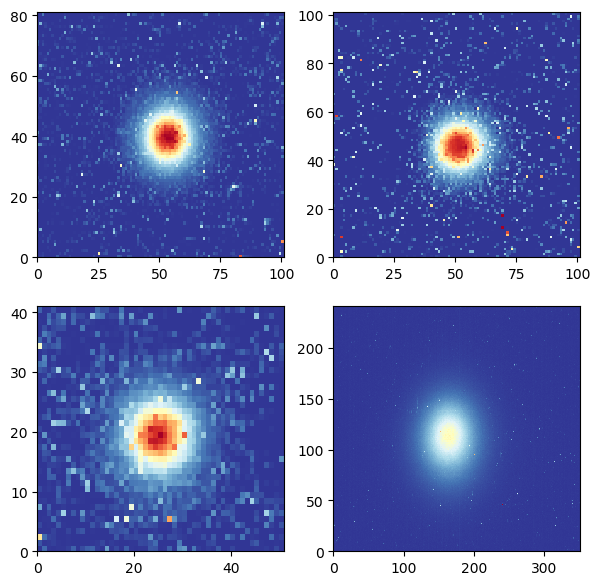

PyObject <matplotlib.collections.QuadMesh object at 0x7fe01732c990>

In [21]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(cam_1_m1[210,:,:], cmap="RdYlBu_r")
ax[1,2].pcolormesh(cam_2_m1[210,:,:], cmap="RdYlBu_r")
ax[2,1].pcolormesh(cam_3_m1[210,:,:], cmap="RdYlBu_r")
ax[2,2].pcolormesh(cam_4_m1[210,:,:], cmap="RdYlBu_r")

## Noise Distribution: 

In [22]:
# noise: 

bins = 0:1:4096

# kde_noise = kde(data_temp[pixel_mask]);

In [23]:
# Camera 1: 

data_temp = cam_1[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_1_frame.y[1]:cam_1_frame.y[2],cam_1_frame.x[1]:cam_1_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_1 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_1 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [24]:
# Camera 2: 

data_temp = cam_2[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_2_frame.y[1]:cam_2_frame.y[2],cam_2_frame.x[1]:cam_2_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_2 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_2 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [25]:
# Camera 3: 

data_temp = cam_3[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:50,:] .= false
pixel_mask[:,end-50:end,:] .= false
pixel_mask[:,:,1:50] .= false
pixel_mask[:,:,end-50:end] .= false
pixel_mask[:,cam_3_frame.y[1]:cam_3_frame.y[2],cam_3_frame.x[1]:cam_3_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_3 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_3 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

In [26]:
# Camera 4: 

data_temp = cam_4[event_mask,:,:]
pixel_mask = trues(size(data_temp))
pixel_mask[:,1:100,:] .= false
pixel_mask[:,end-100:end,:] .= false
pixel_mask[:,:,1:100] .= false
pixel_mask[:,:,end-100:end] .= false
pixel_mask[:,cam_4_frame.y[1]:cam_4_frame.y[2],cam_4_frame.x[1]:cam_4_frame.x[2]] .= false

histogram_noise = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_noise_cam_4 = normalize(histogram_noise, mode=:probability)

histogram_signal = fit(Histogram, data_temp[.!pixel_mask], bins, closed=:left)
histogram_signal_cam_4 = normalize(histogram_signal, mode=:probability);

# plt.pcolormesh(pixel_mask[3,:,:])

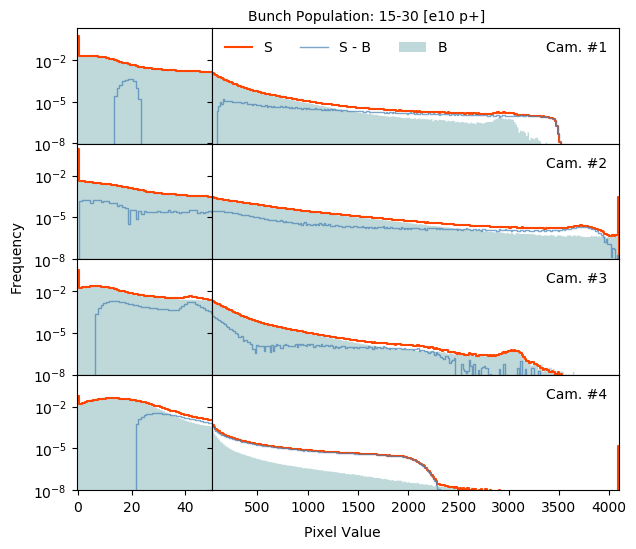

PyObject Text(0.37, 0.9, 'Bunch Population: 15-30 [e10 p+]')

In [27]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,2, figsize=(7,6), sharey=true,  gridspec_kw=Dict("width_ratios"=> [1,3]))

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 15)

ax[5].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[5].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[5].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[5].legend(loc="upper left", ncol=3, framealpha=0.0)
ax[5].text(0.82,0.8,"Cam. #1", transform=ax[5].transAxes)
ax[1].set_xlim(-0.5, 50)
ax[5].set_xlim(50,4097)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 15)

ax[6].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[6].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[6].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[6].text(0.82,0.8,"Cam. #2", transform=ax[6].transAxes)
ax[2].set_xlim(-0.5, 50)
ax[6].set_xlim(50,4097)
ax[6].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 15)

ax[7].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[7].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[7].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[7].text(0.82,0.8,"Cam. #3", transform=ax[7].transAxes)
ax[3].set_xlim(-0.5, 50)
ax[7].set_xlim(50,4097)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 15)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 15)

ax[8].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5,  color=linecolor, label = "S")
ax[8].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[8].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[8].text(0.82,0.8,"Cam. #4", transform=ax[8].transAxes)
ax[4].set_yscale("log")
ax[4].set_xlim(-0.5, 50)
ax[8].set_xlim(50,4097)
ax[8].set_ylim(10e-9, 2)

ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])
ax[7].set_xticks([])
ax[5].set_xticks([])
ax[6].set_xticks([])

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")


# fig.savefig("../plots/fig-1-2.pdf", bbox_inches = "tight")

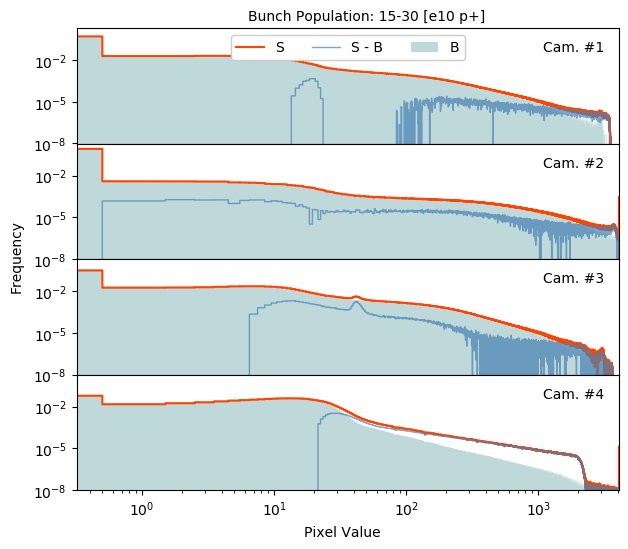

PyObject Text(0.37, 0.9, 'Bunch Population: 15-30 [e10 p+]')

In [28]:
fillcolor = "cadetblue"
linecolor = "orangered"
color_2 = "steelblue"

fig, ax = plt.subplots(4,1, figsize=(7,6), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

# subplot #1 
x_s1, y_s1 = reduced_steps(histogram_signal_cam_1, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_1, 1)

ax[1].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[1].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[1].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, label = "S - B")

ax[1].legend(loc="upper center", ncol=3, framealpha=1)
ax[1].text(0.86,0.8,"Cam. #1", transform=ax[1].transAxes)

#subplot #2:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_2, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_2, 1)

ax[2].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[2].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[2].text(0.86,0.8,"Cam. #2", transform=ax[2].transAxes)
ax[2].set_ylim(10e-9, 1)

#subplot #3:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_3, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_3, 1)

ax[3].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[3].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[3].text(0.86,0.8,"Cam. #3", transform=ax[3].transAxes)

#subplot #4:
x_s1, y_s1 = reduced_steps(histogram_signal_cam_4, 1)
x_b1, y_b1 = reduced_steps(histogram_noise_cam_4, 1)

ax[4].step(x_s1,  y_s1, where = "mid", alpha=1, linewidth=1.5, color=linecolor, label = "S")
ax[4].fill_between(x_b1, y_b1, step="mid", color=fillcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].step(x_s1, y_s1 .- y_b1, where = "mid", alpha=0.7, linewidth=1, color=color_2, )

ax[4].text(0.86,0.8,"Cam. #4", transform=ax[4].transAxes)
ax[4].set_yscale("log")
ax[4].set_xscale("log")
ax[4].set_xlim(0,4097)
ax[4].set_ylim(10e-9, 2)

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
fig.text(0.37, 0.9, "Bunch Population: 15-30 [e10 p+]", va="center", rotation="horizontal")

# fig.savefig("../plots/fig-1-1.pdf", bbox_inches = "tight")

In [ ]:
# FileIO.save("../data/experiment/m2/background-2.jld2", 
#     Dict("cam_1" => histogram_noise_cam_1, 
#         "cam_2" => histogram_noise_cam_2, 
#         "cam_3" => histogram_noise_cam_3, 
#         "cam_4" => histogram_noise_cam_4))

# Histograms Demo: 

In [29]:
x = [0, 1, 1, 2, 1, 2, 3, 4, 4, 7]
histogram_test_1 = fit(Histogram, x, 0:1:8, closed=:left) # maximum + delts
histogram_test_2 = normalize(histogram_test_1, mode=:probability); # * number of elements == 1

In [30]:
@show histogram_test_1.edges
@show histogram_test_1.weights;

histogram_test_1.edges = (0:1:8,)
histogram_test_1.weights = [1, 3, 2, 1, 2, 0, 0, 1]


In [31]:
@show histogram_test_2.edges
@show histogram_test_2.weights;

histogram_test_2.edges = (0:1:8,)
histogram_test_2.weights = [0.1, 0.30000000000000004, 0.2, 0.1, 0.2, 0.0, 0.0, 0.1]


In [32]:
sum(histogram_test_2.weights)

1.0000000000000002

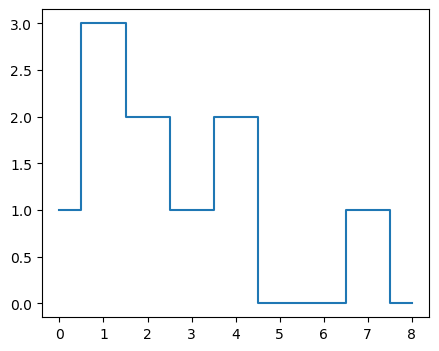

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf11532550>

In [33]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.step(histogram_test_1.edges[1], vcat(histogram_test_1.weights, [0]), where = "mid")

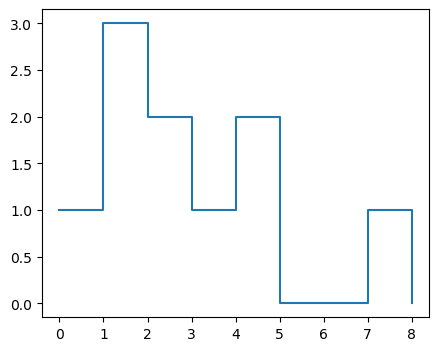

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf0bfbd250>

In [34]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.step(histogram_test_1.edges[1], vcat(histogram_test_1.weights, [0]), where="post")

In [35]:
# histogram_test_1_tmp = load("../data/experiment/m1/background-1.jld2")

In [36]:
histogram_test_1.edges[1][1:end-1]

0:1:7